**Question 5 — (30 points)**

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

**Part 1**

In [35]:
import pandas as pd

# Load the dataset
file_path = '/Users/shreyas/Desktop/DS/2019_ONTIME_REPORTING_FSW.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Use ELAPSED_TIME to calculate the flight duration in hours (since it's in minutes)
df['FLIGHT_DURATION'] = df['ELAPSED_TIME'] / 60  # Convert minutes to hours

# Handle missing or incorrect values by dropping rows where the delays are null, and explicitly create a copy
df_cleaned = df.dropna(subset=['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']).copy()

# Calculate on-time performance using negative of delays (the lower the delay, the better the score)
df_cleaned['ON_TIME_PERFORMANCE'] = - (df_cleaned['DEP_DELAY'] + df_cleaned['ARR_DELAY'])

# Normalize the flight duration and on-time performance
df_cleaned['NORMALIZED_FLIGHT_DURATION'] = (df_cleaned['FLIGHT_DURATION'] - df_cleaned['FLIGHT_DURATION'].min()) / (df_cleaned['FLIGHT_DURATION'].max() - df_cleaned['FLIGHT_DURATION'].min())
df_cleaned['NORMALIZED_ON_TIME_PERFORMANCE'] = (df_cleaned['ON_TIME_PERFORMANCE'] - df_cleaned['ON_TIME_PERFORMANCE'].min()) / (df_cleaned['ON_TIME_PERFORMANCE'].max() - df_cleaned['ON_TIME_PERFORMANCE'].min())

# Combine the two scores into a single performance score
df_cleaned['COMBINED_SCORE'] = df_cleaned['NORMALIZED_FLIGHT_DURATION'] * 0.5 + df_cleaned['NORMALIZED_ON_TIME_PERFORMANCE'] * 0.5  # Equal weighting for both

# Group by airline to calculate the average combined score for each airline
airline_scores = df_cleaned.groupby('CARRIER_CODE')['COMBINED_SCORE'].mean().reset_index()

# Get the top 10 airlines with the highest combined score
top_10_airlines_combined = airline_scores.nlargest(10, 'COMBINED_SCORE')

# multiply each score by 100 to get a percentage
top_10_airlines_combined['COMBINED_SCORE'] = top_10_airlines_combined['COMBINED_SCORE'] * 100

# Display the top 10 airlines
print("The combined score reflects an airline’s overall performance, balancing flight hours and on-time reliability.")
print("Top 10 Airlines by Combined Score:")
print(top_10_airlines_combined)


The combined score reflects an airline’s overall performance, balancing flight hours and on-time reliability.
Top 10 Airlines by Combined Score:
   CARRIER_CODE  COMBINED_SCORE
7            HA       79.181708
2            B6       73.793985
11           UA       68.311972
0            AA       68.115715
3            DL       67.773902
4            EV       67.392788
8            MQ       66.931039
9            NK       65.579166
1            AS       65.470248
14           YX       65.395312


**Part 2**

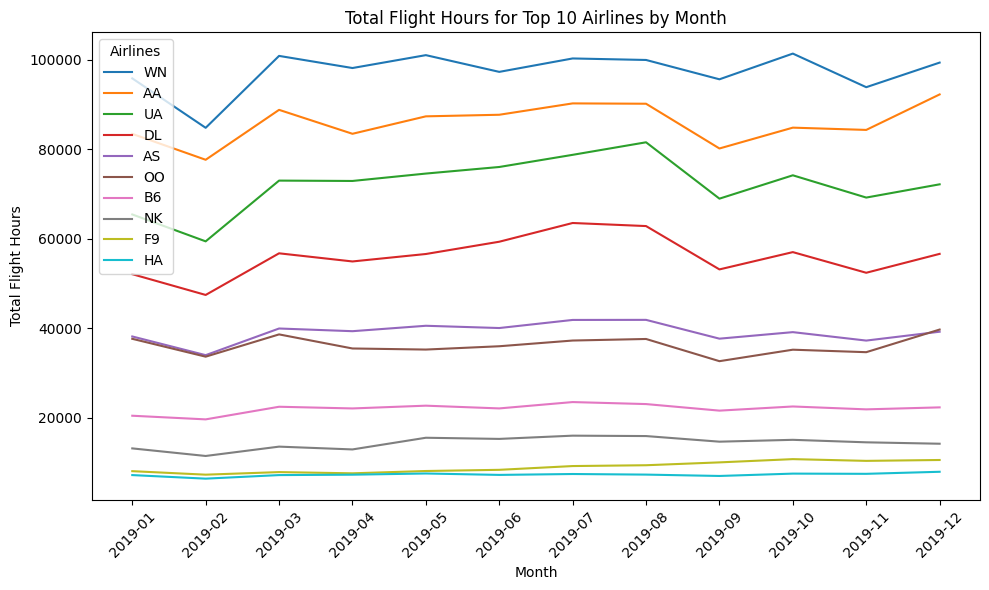

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/shreyas/Desktop/DS/2019_ONTIME_REPORTING_FSW.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Use ELAPSED_TIME to calculate the flight duration in hours (since it's in minutes)
df['FLIGHT_DURATION'] = df['ELAPSED_TIME'] / 60  # Convert minutes to hours

# Extract the month from the flight date
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')
df['MONTH'] = df['FL_DATE'].dt.to_period('M')

# Group by airline and month to calculate total flight hours for each airline per month
monthly_flight_hours = df.groupby(['CARRIER_CODE', 'MONTH'])['FLIGHT_DURATION'].sum().reset_index()

# Get the top 10 airlines by total flight hours
top_10_airlines = monthly_flight_hours.groupby('CARRIER_CODE')['FLIGHT_DURATION'].sum().nlargest(10).index

# Filter the data to include only the top 10 airlines
top_10_airlines_monthly = monthly_flight_hours[monthly_flight_hours['CARRIER_CODE'].isin(top_10_airlines)]

# Visualize the results
plt.figure(figsize=(10, 6))

for airline in top_10_airlines:
    airline_data = top_10_airlines_monthly[top_10_airlines_monthly['CARRIER_CODE'] == airline]
    plt.plot(airline_data['MONTH'].astype(str), airline_data['FLIGHT_DURATION'], label=airline)

plt.xlabel('Month')
plt.ylabel('Total Flight Hours')
plt.title('Total Flight Hours for Top 10 Airlines by Month')
plt.xticks(rotation=45)
plt.legend(title="Airlines")
plt.tight_layout()
plt.show()
